In [24]:
#dependencies for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# DEPENDECIES FOR MODEL
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [7]:
df_train = pd.read_csv('train.csv',parse_dates=['data_ora'])
df_test = pd.read_csv('test.csv',parse_dates=['data_ora'])

In [8]:
print(df_train.info())
print(df_test.describe())
print(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_ora               10886 non-null  datetime64[ns]
 1   sezon                  10886 non-null  int64         
 2   sarbatoare             10886 non-null  int64         
 3   zi_lucratoare          10886 non-null  int64         
 4   vreme                  10886 non-null  int64         
 5   temperatura            10886 non-null  float64       
 6   temperatura_resimtita  10886 non-null  float64       
 7   umiditate              10886 non-null  int64         
 8   viteza_vant            10886 non-null  float64       
 9   ocazionali             10886 non-null  int64         
 10  inregistrati           10886 non-null  int64         
 11  total                  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 102

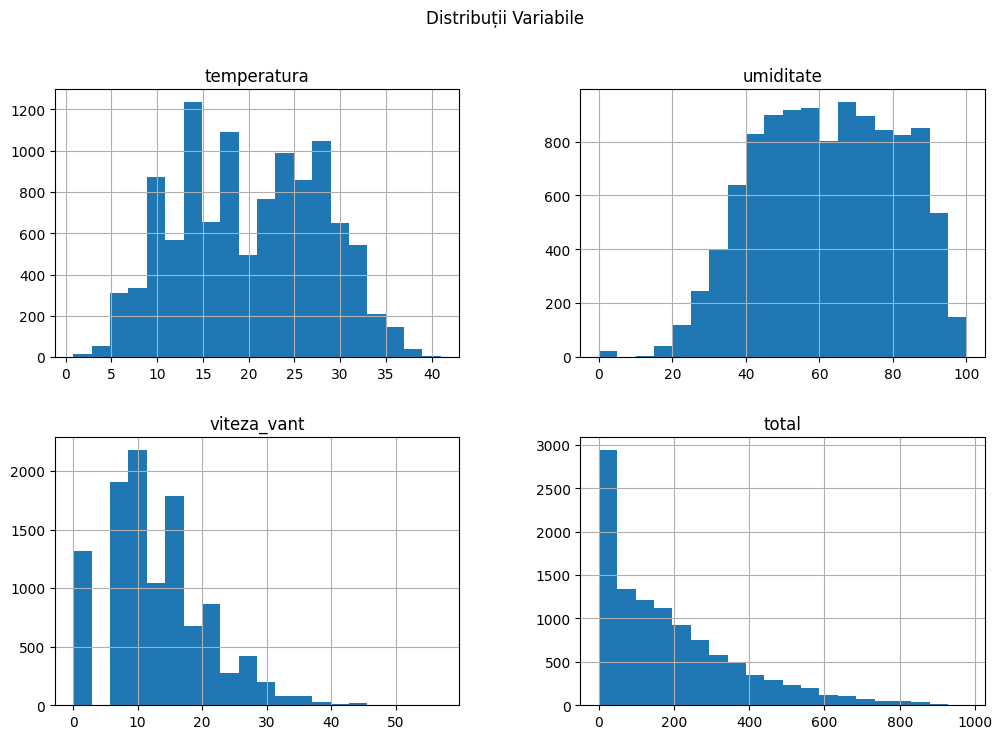

In [9]:
df_train[['temperatura', 'umiditate', 'viteza_vant', 'total']].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribuții Variabile')
plt.show()

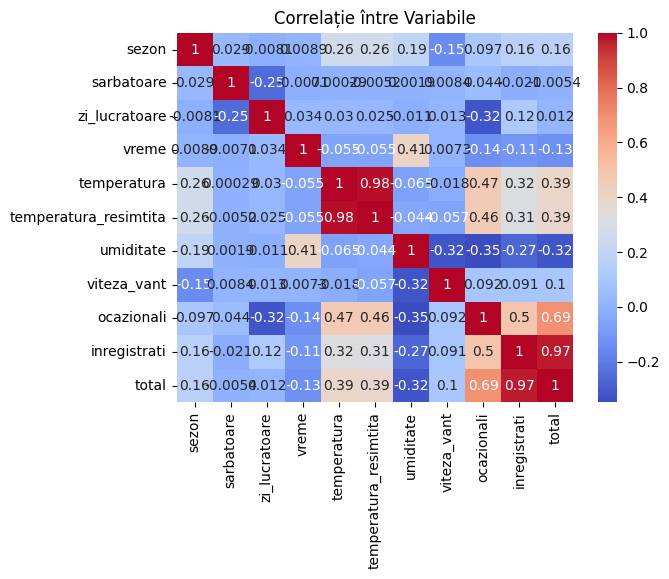

In [10]:
# correlatie
corr_matrix = df_train.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlație între Variabile')
plt.show()

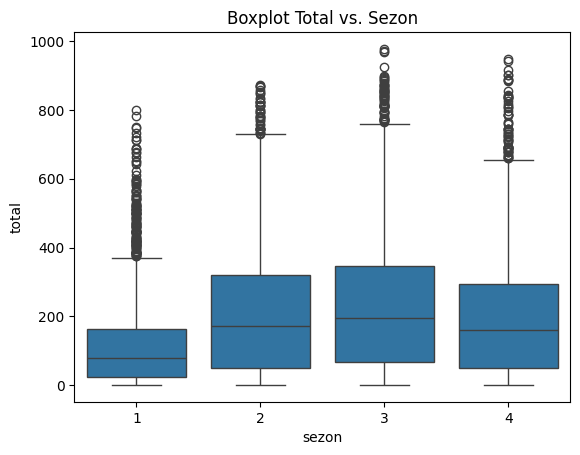

In [11]:
# Boxplot pentru total vs. sezon

sns.boxplot(x='sezon', y='total', data=df_train)
plt.title('Boxplot Total vs. Sezon')
plt.show()

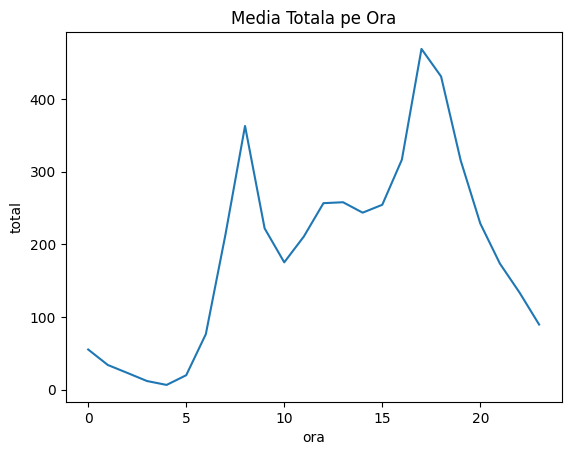

In [13]:
# Graphic temporal # examplu media totala pe ora
df_train['ora'] = df_train['data_ora'].dt.hour
sns.lineplot(x='ora', y='total', data=df_train.groupby('ora').mean().reset_index())
plt.title('Media Totala pe Ora')
plt.show()

In [18]:
# data extraction
def extract_features(df):
    df['ora'] = df['data_ora'].dt.hour
    df['zi_saptamana'] = df['data_ora'].dt.dayofweek
    df['luna'] = df['data_ora'].dt.month
    df['este_weekend'] = df['zi_saptamana'].isin([5, 6]).astype(int)
    return df

# print(extract_features(df_train).head())

In [17]:
df_train_ext = extract_features(df_train)
df_test_ext = extract_features(df_test)


In [25]:
features = ['sezon', 'sarbatoare', 'zi_lucratoare', 'vreme', 'temperatura',
            'temperatura_resimtita', 'umiditate', 'viteza_vant', 'ora',
            'zi_saptamana', 'luna', 'este_weekend']
X = df_train_ext[features]
y = df_train_ext['total']

In [29]:
#model traing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# parametrs
params = {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'random_state': 42}

#train model

gbr_low = GradientBoostingRegressor(loss="quantile",alpha=0.05, **params).fit(X_train, y_train)
gbr_medium = GradientBoostingRegressor(loss="quantile",alpha=0.5, **params).fit(X_train, y_train)
gbr_high = GradientBoostingRegressor(loss="quantile",alpha=0.95, **params).fit(X_train, y_train)

# predict

y_pred_low = gbr_low.predict(X_test)
y_pred_medium = gbr_medium.predict(X_test)
y_pred_high = gbr_high.predict(X_test)
